<h1 style="text-align:center; font-size:36px;">Netflix Data Analysis</h1>


<h4>import pandas</h4>

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("netflix.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<h2>Data cleaning</h2>

<h4>fixing datatypes</h4>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df["date_added"]

0       September 25, 2021
1       September 24, 2021
2       September 24, 2021
3       September 24, 2021
4       September 24, 2021
               ...        
8802     November 20, 2019
8803          July 1, 2019
8804      November 1, 2019
8805      January 11, 2020
8806         March 2, 2019
Name: date_added, Length: 8807, dtype: object

In [6]:
df["date_added"]=df["date_added"].str.strip()

**to_datetime**

In [7]:
df["date_added"]=pd.to_datetime(df["date_added"])

In [8]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

<h4>handling null values</h4>

In [9]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [11]:
fill_values = {
    'director': 'unknown',  
    'cast': 'unknown',  
    'country': 'unknown',
    "rating" : 'not rated',
    "duration":"unknown"
}

In [12]:
df=df.fillna(fill_values)

In [13]:
df['date_added']=df['date_added'].fillna(pd.Timestamp('1900-01-01'))

In [14]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

<h2>Exploratory Data Analysis</h2>

<h4>import matplotlib</h4>

In [15]:
import matplotlib.pyplot as plt

<h4>Distribution of Titles by Type (Movie or TV Show)</h4>

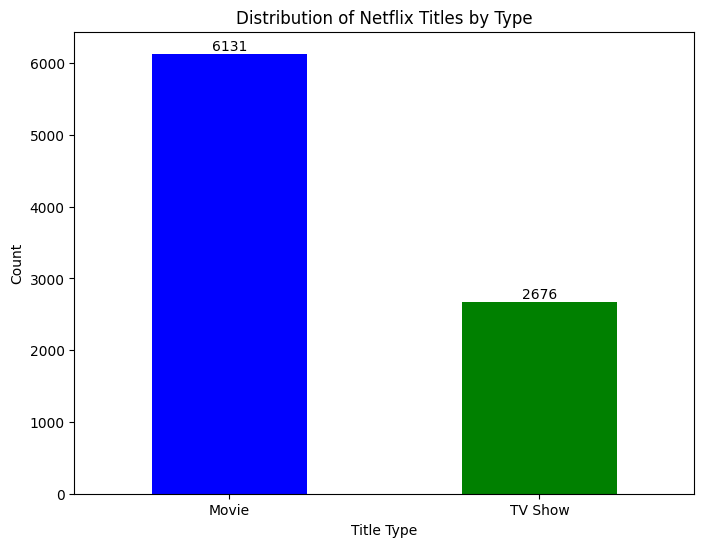

In [16]:
title_types = df['type'].value_counts()
plt.figure(figsize=(8, 6))
title_types.plot(kind="bar", color=['blue', 'green'])
for index,value in enumerate(title_types):
    plt.text(index,value, str(value), ha='center', va='bottom')
plt.title('Distribution of Netflix Titles by Type')
plt.xlabel('Title Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

<h4>Top 10 Genres on Netflix</h4>

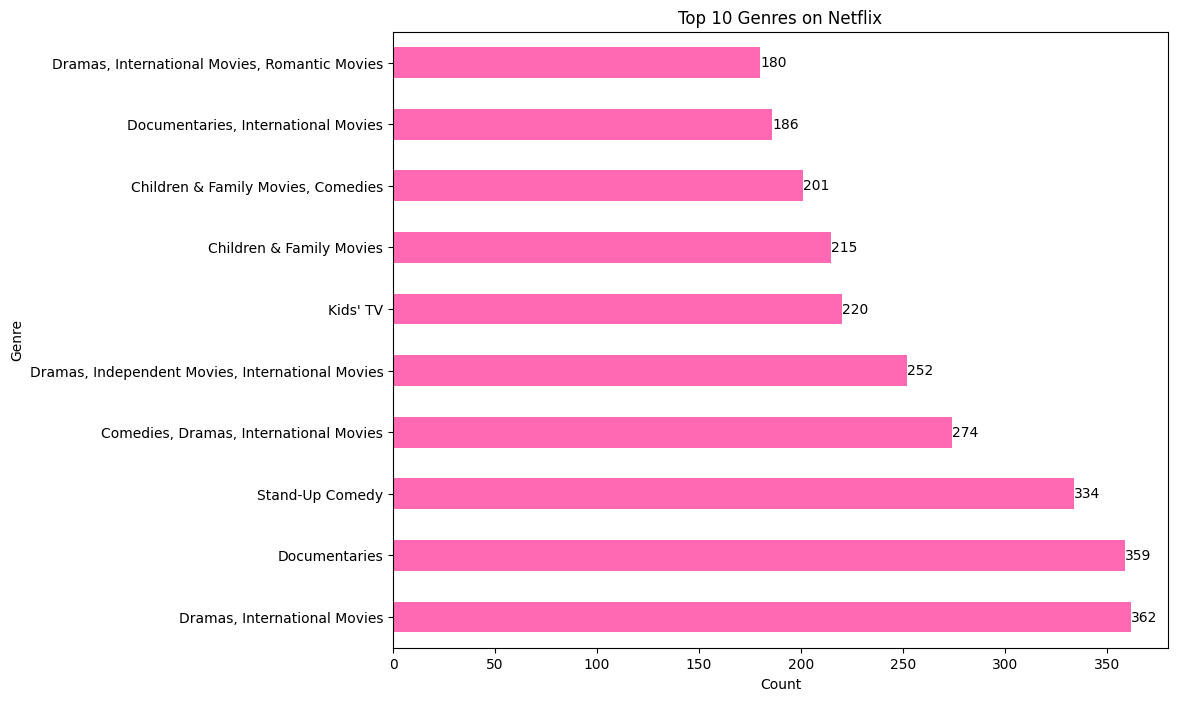

In [17]:
genres_count = df['listed_in'].value_counts().head(10)
plt.figure(figsize=(10, 8))
genres_count.plot(kind="barh",color="hotpink")
for index,value in enumerate(genres_count):
    plt.text(value, index, str(value),ha='left', va='center')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


<h4>Distribution of Ratings</h4>

**handling the same type of rating and show graph**

In [18]:
df["rating"]=df["rating"].replace(["66 min", "74 min", "84 min","UR","not rated"],"NR")

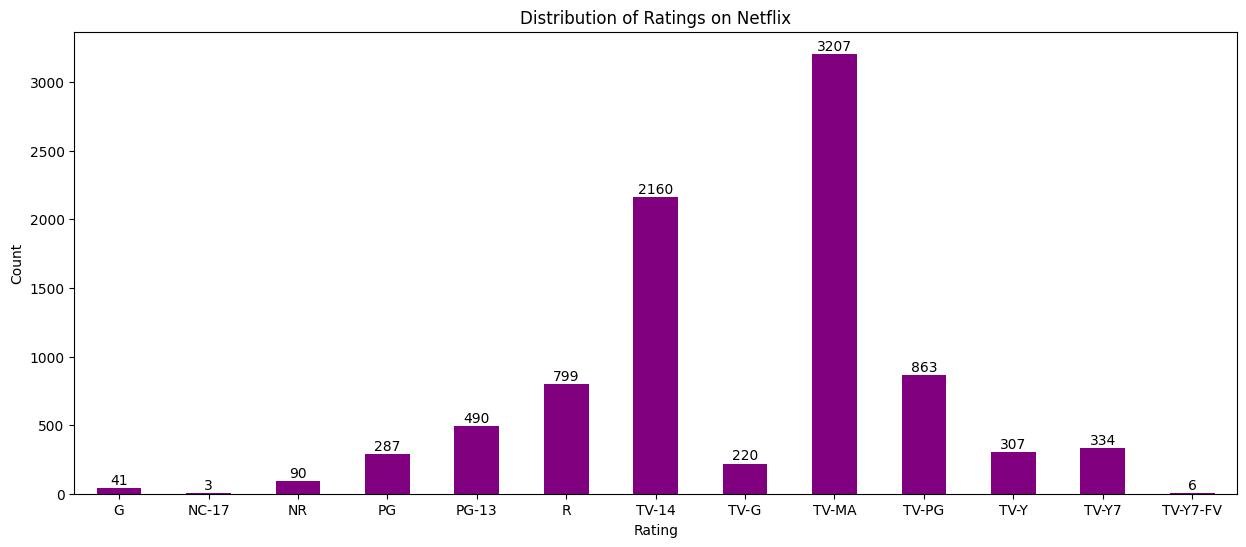

In [19]:
ratings_count = df['rating'].value_counts().sort_index()
plt.figure(figsize=(15, 6))
ratings_count.plot(kind='bar', color='purple')
for index, value in enumerate(ratings_count):
    plt.text(index, value + 5, str(value), ha='center', va='bottom')
plt.title('Distribution of Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

<h4>distribution of 'release_year'</h4>

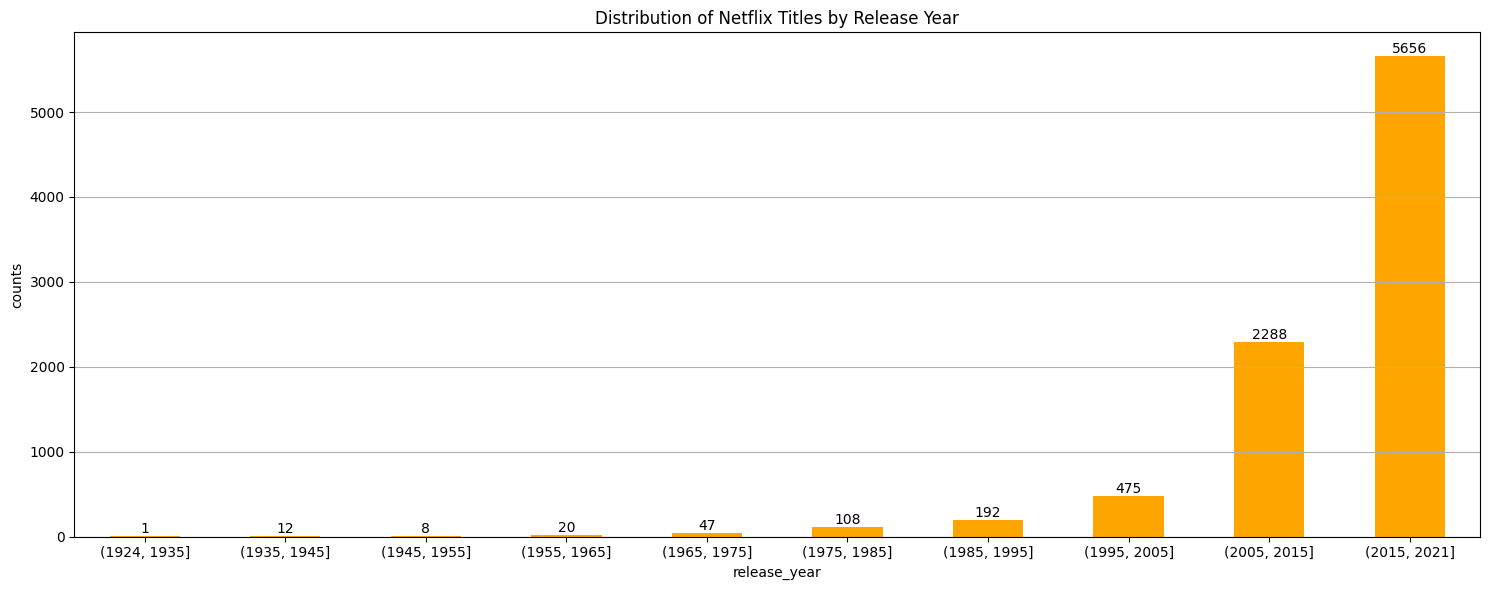

In [20]:
bin_edges = [1924, 1935, 1945,1955,1965,1975,1985,1995,2005,2015,2021]
grouped_counts = pd.cut(df['release_year'], bins=bin_edges).value_counts().sort_index()
plt.figure(figsize=(15,6))
grouped_counts.plot(kind="bar",color="orange")
for index,values in enumerate(grouped_counts):
    plt.text(index,values,str(values),ha="center",va="bottom")
plt.title('Distribution of Netflix Titles by Release Year')
plt.ylabel("counts")
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis="y")
plt.show()

<h3>conclusion</h3>

Content Types: We've identified the number of TV shows and movies available on Netflix.
Top Genres: We've discovered the top 10 genres that are most prevalent on Netflix.
Rating Spread: We've analyzed the distribution of different content ratings to understand the variety of content available.
Release Year Trends: We've grouped release years into bins to see how many TV shows and movies were released in each period

This analysis provides insights into the variety of content available, popular genres, and distribution of titles by release date.